## Help your hedge fund manager!

You have two datasets at your disposal: `Balance_Sheet.xlsx` and `Income_Statement.xlsx`. Both these datasets have three columns in common:
- `"Company"`: The company's ticker name.
- `"comp_type"` The type of industry the company in question belongs to. It is either `"tech"` for companies in the technology industry, `"fmcg"` for companies in the fast-moving consumer goods industry, and `"real_est"` for companies in the real estate industry. 
- `"Year"`: The year the company's information is from.

The rest of the columns in the datasets contain information from the financial statement of the `"Company"` in question. Note that the columns in `Balance_Sheet.xlsx` only contain financial information from the balance sheet. Similarly, the columns in `Income_Statement.xlsx` only contain financial information from the income statement. The columns are named accordingly. For instance, the column `"Total Liab"` from `Balance_Sheet.xlsx` is the total liability.

In [93]:
import numpy as np
import pandas as pd
import seaborn as sns

# **1.Importing data**

In [94]:
# Read the Balance_Sheet.xlsx file into a DataFrame
balance_sheet_df = pd.read_excel("data/Balance_Sheet.xlsx")
balance_sheet_df.head()

,Unnamed: 0,Year,comp_type,company,Accounts Payable,Cash,Inventory,Property Plant Equipment,Short Term Investments,Total Assets,Total Current Assets,Total Current Liabilities,Total Liab,Total Stockholder Equity
0,0,2019,tech,AAPL,46236000000,48844000000,4.106000e+09,37378000000,5.171300e+10,338516000000,162819000000,105718000000,248028000000,90488000000
1,1,2020,tech,AAPL,42296000000,38016000000,4.061000e+09,45336000000,5.292700e+10,323888000000,143713000000,105392000000,258549000000,65339000000
2,2,2021,tech,AAPL,54763000000,34940000000,6.580000e+09,49527000000,2.769900e+10,351002000000,134836000000,125481000000,287912000000,63090000000
3,3,2022,tech,AAPL,64115000000,23646000000,4.946000e+09,84234000000,2.465800e+10,352755000000,135405000000,153982000000,302083000000,50672000000
4,4,2019,tech,MSFT,9382000000,11356000000,2.063000e+09,43856000000,1.224760e+11,286556000000,175552000000,69420000000,184226000000,102330000000


In [95]:
income_statement_df = pd.read_excel("data/Income_Statement.xlsx")
income_statement_df.head()

,Unnamed: 0,Year,comp_type,company,Cost Of Goods Sold,Gross Profit,Operating Income,Total Operating Expenses,Total Revenue
0,0,2019,tech,AAPL,161782000000,98392000000,63930000000,196244000000,260174000000
1,1,2020,tech,AAPL,169559000000,104956000000,66288000000,208227000000,274515000000
2,2,2021,tech,AAPL,212981000000,152836000000,108949000000,256868000000,365817000000
3,3,2022,tech,AAPL,223546000000,170782000000,119437000000,274891000000,394328000000
4,4,2019,tech,MSFT,42910000000,82933000000,42959000000,82884000000,125843000000


# **2.Merge Dataframes**

In [96]:
df_ratios = pd.merge(balance_sheet_df,income_statement_df, on=["Year", "company","comp_type"])
df_ratios.head()

,Unnamed: 0_x,Year,comp_type,company,Accounts Payable,Cash,Inventory,Property Plant Equipment,Short Term Investments,Total Assets,Total Current Assets,Total Current Liabilities,Total Liab,Total Stockholder Equity,Unnamed: 0_y,Cost Of Goods Sold,Gross Profit,Operating Income,Total Operating Expenses,Total Revenue
0,0,2019,tech,AAPL,46236000000,48844000000,4.106000e+09,37378000000,5.171300e+10,338516000000,162819000000,105718000000,248028000000,90488000000,0,161782000000,98392000000,63930000000,196244000000,260174000000
1,1,2020,tech,AAPL,42296000000,38016000000,4.061000e+09,45336000000,5.292700e+10,323888000000,143713000000,105392000000,258549000000,65339000000,1,169559000000,104956000000,66288000000,208227000000,274515000000
2,2,2021,tech,AAPL,54763000000,34940000000,6.580000e+09,49527000000,2.769900e+10,351002000000,134836000000,125481000000,287912000000,63090000000,2,212981000000,152836000000,108949000000,256868000000,365817000000
3,3,2022,tech,AAPL,64115000000,23646000000,4.946000e+09,84234000000,2.465800e+10,352755000000,135405000000,153982000000,302083000000,50672000000,3,223546000000,170782000000,119437000000,274891000000,394328000000
4,4,2019,tech,MSFT,9382000000,11356000000,2.063000e+09,43856000000,1.224760e+11,286556000000,175552000000,69420000000,184226000000,102330000000,4,42910000000,82933000000,42959000000,82884000000,125843000000


In [97]:
df_ratios["leverage_ratio"] = df_ratios["Total Assets"]/df_ratios["Total Stockholder Equity"]
df_ratios.head()

,Unnamed: 0_x,Year,comp_type,company,Accounts Payable,Cash,Inventory,Property Plant Equipment,Short Term Investments,Total Assets,Total Current Assets,Total Current Liabilities,Total Liab,Total Stockholder Equity,Unnamed: 0_y,Cost Of Goods Sold,Gross Profit,Operating Income,Total Operating Expenses,Total Revenue,leverage_ratio
0,0,2019,tech,AAPL,46236000000,48844000000,4.106000e+09,37378000000,5.171300e+10,338516000000,162819000000,105718000000,248028000000,90488000000,0,161782000000,98392000000,63930000000,196244000000,260174000000,3.741004
1,1,2020,tech,AAPL,42296000000,38016000000,4.061000e+09,45336000000,5.292700e+10,323888000000,143713000000,105392000000,258549000000,65339000000,1,169559000000,104956000000,66288000000,208227000000,274515000000,4.957039
2,2,2021,tech,AAPL,54763000000,34940000000,6.580000e+09,49527000000,2.769900e+10,351002000000,134836000000,125481000000,287912000000,63090000000,2,212981000000,152836000000,108949000000,256868000000,365817000000,5.563512
3,3,2022,tech,AAPL,64115000000,23646000000,4.946000e+09,84234000000,2.465800e+10,352755000000,135405000000,153982000000,302083000000,50672000000,3,223546000000,170782000000,119437000000,274891000000,394328000000,6.961537
4,4,2019,tech,MSFT,9382000000,11356000000,2.063000e+09,43856000000,1.224760e+11,286556000000,175552000000,69420000000,184226000000,102330000000,4,42910000000,82933000000,42959000000,82884000000,125843000000,2.800313


In [98]:
df_ratios["profitability_ratio"] = (df_ratios["Total Revenue"] - df_ratios["Cost Of Goods Sold"]) / df_ratios["Total Revenue"]
df_ratios.head()

,Unnamed: 0_x,Year,comp_type,company,Accounts Payable,Cash,Inventory,Property Plant Equipment,Short Term Investments,Total Assets,Total Current Assets,Total Current Liabilities,Total Liab,Total Stockholder Equity,Unnamed: 0_y,Cost Of Goods Sold,Gross Profit,Operating Income,Total Operating Expenses,Total Revenue,leverage_ratio,profitability_ratio
0,0,2019,tech,AAPL,46236000000,48844000000,4.106000e+09,37378000000,5.171300e+10,338516000000,162819000000,105718000000,248028000000,90488000000,0,161782000000,98392000000,63930000000,196244000000,260174000000,3.741004,0.378178
1,1,2020,tech,AAPL,42296000000,38016000000,4.061000e+09,45336000000,5.292700e+10,323888000000,143713000000,105392000000,258549000000,65339000000,1,169559000000,104956000000,66288000000,208227000000,274515000000,4.957039,0.382332
2,2,2021,tech,AAPL,54763000000,34940000000,6.580000e+09,49527000000,2.769900e+10,351002000000,134836000000,125481000000,287912000000,63090000000,2,212981000000,152836000000,108949000000,256868000000,365817000000,5.563512,0.417794
3,3,2022,tech,AAPL,64115000000,23646000000,4.946000e+09,84234000000,2.465800e+10,352755000000,135405000000,153982000000,302083000000,50672000000,3,223546000000,170782000000,119437000000,274891000000,394328000000,6.961537,0.433096
4,4,2019,tech,MSFT,9382000000,11356000000,2.063000e+09,43856000000,1.224760e+11,286556000000,175552000000,69420000000,184226000000,102330000000,4,42910000000,82933000000,42959000000,82884000000,125843000000,2.800313,0.659020


In [99]:
df = df_ratios[["comp_type"]].copy()
df["equity_multiplier"] = df_ratios["leverage_ratio"]
df.head()

,comp_type,equity_multiplier
0,tech,3.741004
1,tech,4.957039
2,tech,5.563512
3,tech,6.961537
4,tech,2.800313


In [100]:
lowest_profitability = df_ratios.groupby("comp_type")["profitability_ratio"].mean().idxmin()
lowest_profitability

'fmcg'

In [101]:
highest_leverage = df_ratios.groupby("comp_type")["leverage_ratio"].mean().idxmax()
highest_leverage

'real_est'

In [102]:
relationship = df_ratios[df_ratios["comp_type"] == "real_est"][["leverage_ratio", "profitability_ratio"]].corr().iloc[0, 1]

if relationship > 0:
    relationship = "positive"
elif relationship < 0:
    relationship = "negative"
else:
    relationship = "no relationship"
    
relationship

'positive'

In [103]:
df.pivot_table(index="comp_type", values="equity_multiplier")

,equity_multiplier
comp_type,
fmcg,4.049784
real_est,7.353476
tech,2.777448


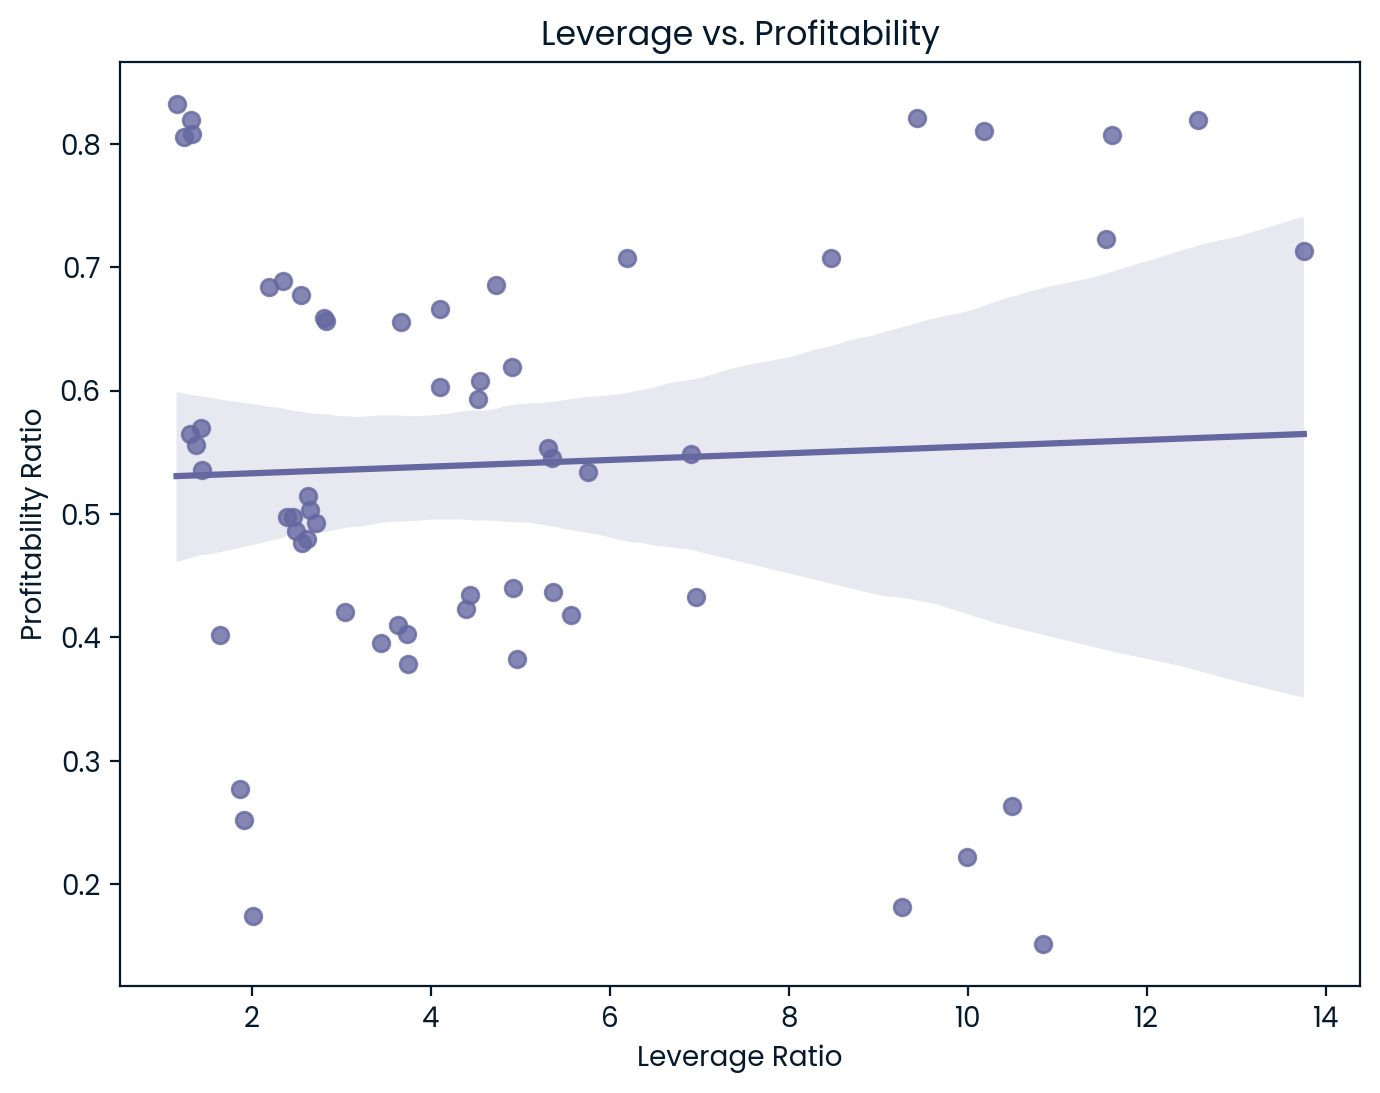

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

# 建立只包含相關欄位的 DataFrame
df_plot = df_ratios[["leverage_ratio", "profitability_ratio"]].copy()

# 繪製回歸圖
plt.figure(figsize=(8, 6))
sns.regplot(data=df_plot, x="leverage_ratio", y="profitability_ratio")  # 這裡的 x 軸應該是 "leverage"

# 設定標題與標籤
plt.title("Leverage vs. Profitability")
plt.xlabel("Leverage Ratio")
plt.ylabel("Profitability Ratio")

# 顯示圖表
plt.show()